In [1]:
!pip install openpyxl
from openpyxl.workbook import Workbook
import pandas as pd
import numpy as np
train = pd.read_csv('../input/dare-reality/train.csv',skipinitialspace=True)
test = pd.read_csv('../input/dare-reality/test.csv',skipinitialspace=True)
train_weather = pd.read_csv('../input/dare-reality/train_weather.csv',skipinitialspace=True)
test_weather = pd.read_csv('../input/dare-reality/test_weather.csv',skipinitialspace=True)
subm = pd.read_csv('../input/dare-reality/submission.csv',skipinitialspace=True)

     |████████████████████████████████| 242 kB 291 kB/s 


In [2]:
np.mean(train[train.NUMBER == 6]['LAP_TIME'])
np.mean(train[train.NUMBER == 99]['LAP_TIME'])

91.74736842105263

In [3]:
#train['DRIVER_NUMBER'].value_counts()
#train.head()
test['NUMBER'].value_counts()
test[test.DRIVER_NAME == 'SVANDOO'].shape
train[train.DRIVER_NAME == 'SVANDOO'].shape

train.groupby(['DRIVER_NAME','NUMBER']).size()
len(train['DRIVER_NAME'].unique())

24

In [4]:
train['NUMBER'].value_counts()

99    475
17    470
36    460
13    457
71    456
88    455
5     448
22    441
27    438
48    438
28    435
23    434
8     433
25    426
20    425
11    416
94    413
6     407
33    405
10    400
37    394
29    388
7     383
4     379
Name: NUMBER, dtype: int64

<AxesSubplot:>

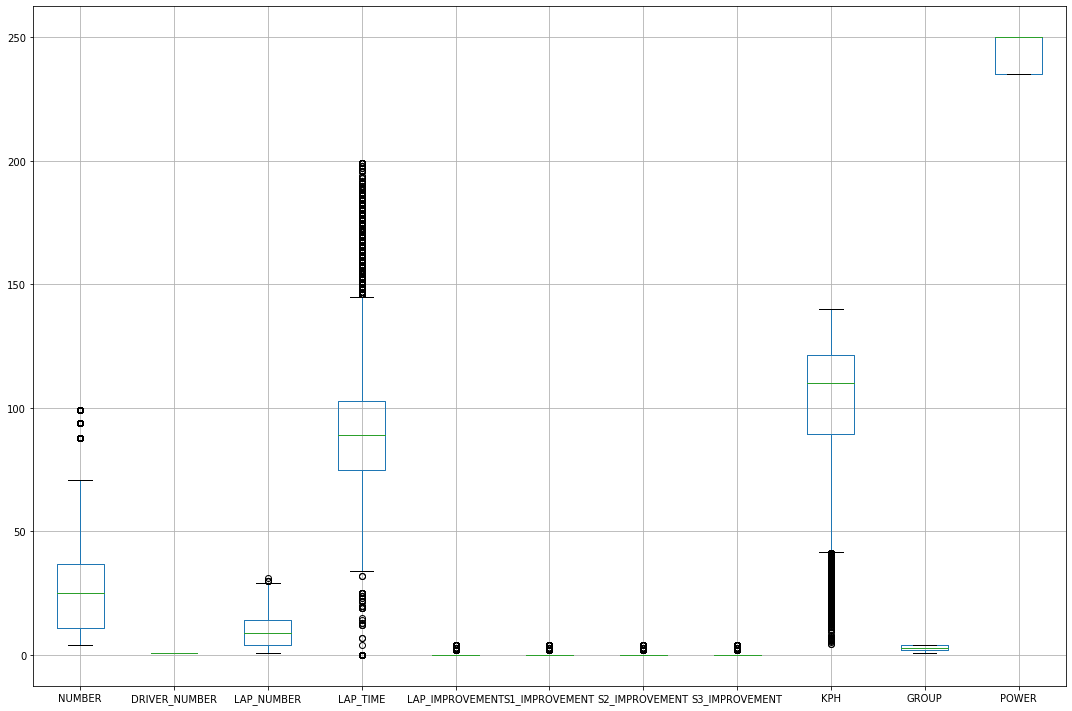

In [5]:
#figure(figsize=(18.5,12.5))
#train['KPH'] = np.log1p(train['KPH'])
train.boxplot(figsize=(18.5,12.5))


In [6]:
min(train['LAP_TIME'])
train[train.LAP_TIME < 10]
train[(train.DRIVER_NAME == 'J') &  (train.EVENT == 'Free Practice 1') & (train.LOCATION == 'Location 2')]
train[(train.DRIVER_NAME == 'ACO') &  (train.EVENT == 'Free Practice 3') & (train.LOCATION == 'Location 1')]
print(train.shape)
train_new = train[train.LAP_TIME > 0]
print(train_new.shape)

train_new_lap_time = train_new[['DRIVER_NAME','LOCATION','EVENT','LAP_TIME']].groupby(['DRIVER_NAME','LOCATION','EVENT']).agg(['mean']).reset_index()
train_new_lap_time.columns  = ['DRIVER_NAME','LOCATION','EVENT','NEW_LAP_TIME_MEAN']
#train = pd.merge(train,train_new_lap_time,how="left",on=['DRIVER_NAME','LOCATION','EVENT'])
#train['LAP_TIME'] = train.apply(lambda x:x['LAP_TIME'] if x['LAP_TIME'] > 0 else x['NEW_LAP_TIME_MEAN'],axis=1)
#train.drop('NEW_LAP_TIME_MEAN',axis=1,inplace=True)

(10276, 25)
(10136, 25)


In [7]:
pd.set_option('display.max_columns',None)
train.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
0,10,1,1,92,0,NaN,05:43.3,0,35.427,0,43.313,0,28.8,07:02.0,22:02.0,05:43.3,00:35.4,00:43.3,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2
1,10,1,2,87,2,NaN,25.674,2,33.399,2,41.922,2,120.5,08:43.0,23:43.0,00:25.7,00:33.4,00:41.9,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
2,10,1,3,73,0,B,28.129,0,34.091,0,57.248,0,101.9,10:42.5,25:42.5,00:28.1,00:34.1,00:57.2,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2
3,11,1,1,73,0,NaN,01:05.0,0,38.416,0,56.833,0,75.9,02:40.2,17:40.2,01:05.0,00:38.4,00:56.8,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2
4,11,1,2,73,0,NaN,28.013,0,36.743,0,44.716,0,111.2,04:29.7,19:29.7,00:28.0,00:36.7,00:44.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2


In [8]:

train['EVENT1'] = train['EVENT']
train['EVENT1'] = train['EVENT1'].apply(lambda x:'Free Practice' if x.find('Free Practice') != -1  else x)
train['EVENT1'] = train['EVENT1'].apply(lambda x:'Qualifying Group' if x.find('Qualifying Group')  != -1 else x)

In [9]:
train['EVENT1'].unique()

array(['Free Practice', 'Qualifying Group'], dtype=object)

In [10]:
lap_time = train[['LAP_NUMBER','LOCATION','LAP_TIME']].groupby(['LAP_NUMBER','LOCATION']).agg(['mean']).reset_index()
lap_time.columns  = ['LAP_NUMBER','LOCATION','LAP_TIME_MEAN']
train.drop(['EVENT1'],axis=1,inplace=True)

In [11]:

test_weather = test_weather.rename(columns={"EVENTS":"EVENT"})

In [12]:
test_weather['RAIN'] = test_weather['RAIN'].astype(object) 
test_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIME_UTC_SECONDS  167 non-null    int64 
 1   TIME_UTC_STR      167 non-null    object
 2   AIR_TEMP          167 non-null    object
 3   TRACK_TEMP        167 non-null    object
 4   HUMIDITY          167 non-null    object
 5   PRESSURE          167 non-null    object
 6   WIND_SPEED        167 non-null    object
 7   WIND_DIRECTION    167 non-null    int64 
 8   RAIN              167 non-null    object
 9   LOCATION          167 non-null    object
 10  EVENT             167 non-null    object
dtypes: int64(2), object(9)
memory usage: 14.5+ KB


In [13]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIME_UTC_SECONDS  914 non-null    int64 
 1   TIME_UTC_STR      914 non-null    object
 2   AIR_TEMP          914 non-null    object
 3   TRACK_TEMP        914 non-null    object
 4   HUMIDITY          914 non-null    object
 5   PRESSURE          914 non-null    object
 6   WIND_SPEED        914 non-null    object
 7   WIND_DIRECTION    914 non-null    int64 
 8   RAIN              914 non-null    object
 9   LOCATION          914 non-null    object
 10  EVENT             914 non-null    object
dtypes: int64(2), object(9)
memory usage: 78.7+ KB


In [14]:
train_weather['RAIN'] = train_weather['RAIN'].str.replace(",",".")
test_weather['HUMIDITY'] = test_weather['HUMIDITY'].str.replace(",",".")
test_weather['AIR_TEMP'] = test_weather['AIR_TEMP'].str.replace(",","")
train_weather['HUMIDITY'] = train_weather['HUMIDITY'].str.replace(",",".")

train_weather['AIR_TEMP'] = train_weather['AIR_TEMP'].str.replace(",","")

test_weather['TRACK_TEMP'] = test_weather['TRACK_TEMP'].str.replace(",","")
train_weather['TRACK_TEMP'] = train_weather['TRACK_TEMP'].str.replace(",",".")
weather = pd.concat([train_weather,test_weather],axis=0)
weather['PRESSURE'] = weather['PRESSURE'].str.replace("7.76.872","76.872")
weather['PRESSURE'] = weather['PRESSURE'].str.replace("7.76.804","76.804")



weather['RAIN'] = weather['RAIN'].astype(float)
weather['HUMIDITY'] = weather['HUMIDITY'].astype(float)
weather['AIR_TEMP'] = weather['AIR_TEMP'].astype(float)
weather['TRACK_TEMP'] = weather['TRACK_TEMP'].astype(float)




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


In [15]:
import time
import datetime
weather['TIME_UTC_SECONDS'] = pd.to_datetime(weather['TIME_UTC_SECONDS'], unit='s', origin='unix') 
weather['HOUR'] = weather['TIME_UTC_SECONDS'].dt.time

In [16]:
driver_ranking = pd.DataFrame(pd.Series(range(1,25)), columns=['DRIVER_RANK'])
driver_rank = train[['DRIVER_NAME','LAP_TIME']].groupby(by='DRIVER_NAME').mean()
driver_rank.sort_values(by='LAP_TIME', inplace=True, ignore_index=False)
# Creating numpy arrays for forming dataframe
driver_name = driver_rank.index.to_numpy()
driver_laptime_mean = driver_rank['LAP_TIME'].to_numpy()
driver_rank_number = np.arange(1,25)
# Creating dataframe for creating driver rank replace dict
dr_rank = pd.DataFrame(
{
    'DRIVER_NAME': driver_name,
    #'Driver_Laptime': driver_laptime_mean,
    'Driver_Rank': driver_rank_number
})
dr_rank.head(3)

# Creating dict for replacing driver names with their standing/ranking w.r.t. laptime mean()
driver_dict = dict(zip(dr_rank['DRIVER_NAME'], dr_rank['Driver_Rank']))

# Create structure for replacing values from all columns at once
replaceStruct = {
                "DRIVER_NAME": driver_dict
                }

In [17]:

WIND_DIRECTION = weather[['LOCATION','EVENT','WIND_DIRECTION']].groupby(['LOCATION','EVENT']).agg(['mean']).reset_index()
WIND_DIRECTION.columns  = ['LOCATION','EVENT','WIND_DIRECTION_MEAN']


HUMIDITY = weather[['LOCATION','EVENT','HUMIDITY']].groupby(['LOCATION','EVENT']).agg(['mean']).reset_index()
HUMIDITY.columns  = ['LOCATION','EVENT','HUMIDITY_MEAN']


AIR_TEMP = weather[['LOCATION','EVENT','AIR_TEMP']].groupby(['LOCATION','EVENT']).agg(['mean']).reset_index()
AIR_TEMP.columns  = ['LOCATION','EVENT','AIR_TEMP_MEAN']


RAIN = weather[['LOCATION','EVENT','RAIN']].groupby(['LOCATION','EVENT']).agg(['mean']).reset_index()
RAIN.columns  = ['LOCATION','EVENT','RAIN_MEAN']

TRACK_TEMP = weather[['LOCATION','EVENT','TRACK_TEMP']].groupby(['LOCATION','EVENT']).agg(['mean']).reset_index()
TRACK_TEMP.columns  = ['LOCATION','EVENT','TRACK_TEMP_MEAN']

In [18]:
pd.set_option('display.max_columns',None)
train.tail()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT
10271,99,1,17,84,0,NaN,22.936,0,21.231,0,23.701,0,124.9,23:54.7,23:54.7,00:22.9,00:21.2,00:23.7,PWEHRL,NaN,NaN,TAG,250.0,Location 8,Free Practice 1
10272,99,1,18,70,0,B,23.61,0,22.432,0,30.281,0,111.1,25:11.0,25:11.0,00:23.6,00:22.4,00:30.3,PWEHRL,NaN,NaN,TAG,235.0,Location 8,Free Practice 1
10273,99,1,19,70,0,NaN,02:17.1,0,22.681,0,24.308,0,46.1,28:15.1,28:15.1,02:17.1,00:22.7,00:24.3,PWEHRL,01:59.9,NaN,TAG,250.0,Location 8,Free Practice 1
10274,99,1,20,155,2,NaN,22.539,2,21.057,2,23.548,2,126.3,29:22.3,29:22.3,00:22.5,00:21.1,00:23.5,PWEHRL,NaN,NaN,TAG,250.0,Location 8,Free Practice 1
10275,99,1,21,90,0,NaN,23.193,0,22.026,0,24.056,0,122.4,30:31.5,30:31.5,00:23.2,00:22.0,00:24.1,PWEHRL,NaN,NaN,TAG,NaN,Location 8,Free Practice 1


In [19]:
train['TEAM'].unique()
train[train.GROUP == 2.]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NUMBER                       420 non-null    int64  
 1   DRIVER_NUMBER                420 non-null    int64  
 2   LAP_NUMBER                   420 non-null    int64  
 3   LAP_TIME                     0 non-null      float64
 4   LAP_IMPROVEMENT              420 non-null    int64  
 5   CROSSING_FINISH_LINE_IN_PIT  16 non-null     object 
 6   S1                           420 non-null    object 
 7   S1_IMPROVEMENT               420 non-null    int64  
 8   S2                           420 non-null    object 
 9   S2_IMPROVEMENT               420 non-null    int64  
 10  S3                           418 non-null    object 
 11  S3_IMPROVEMENT               420 non-null    int64  
 12  KPH                          418 non-null    float64
 13  ELAPSED             

In [20]:
train_weather.head()

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT
0,1618042506,10/04/21 8:15,15,18.4,60,1018.05,2.12187,165,-1,Location 2,Free Practice 2
1,1618042567,10/04/21 8:16,15.0556,18.4,60,1018.12,1.06093,177,-1,Location 2,Free Practice 2
2,1618042632,10/04/21 8:17,15.0556,18.5,60,1018.12,2.12187,157,-1,Location 2,Free Practice 2
3,1618042697,10/04/21 8:18,15.0556,18.5,60,1018.08,2.12187,163,-1,Location 2,Free Practice 2
4,1618042762,10/04/21 8:19,15.1111,18.5,60,1018.15,3.1828,149,-1,Location 2,Free Practice 2


Text(0.5, 1.0, 'pearson correlation')

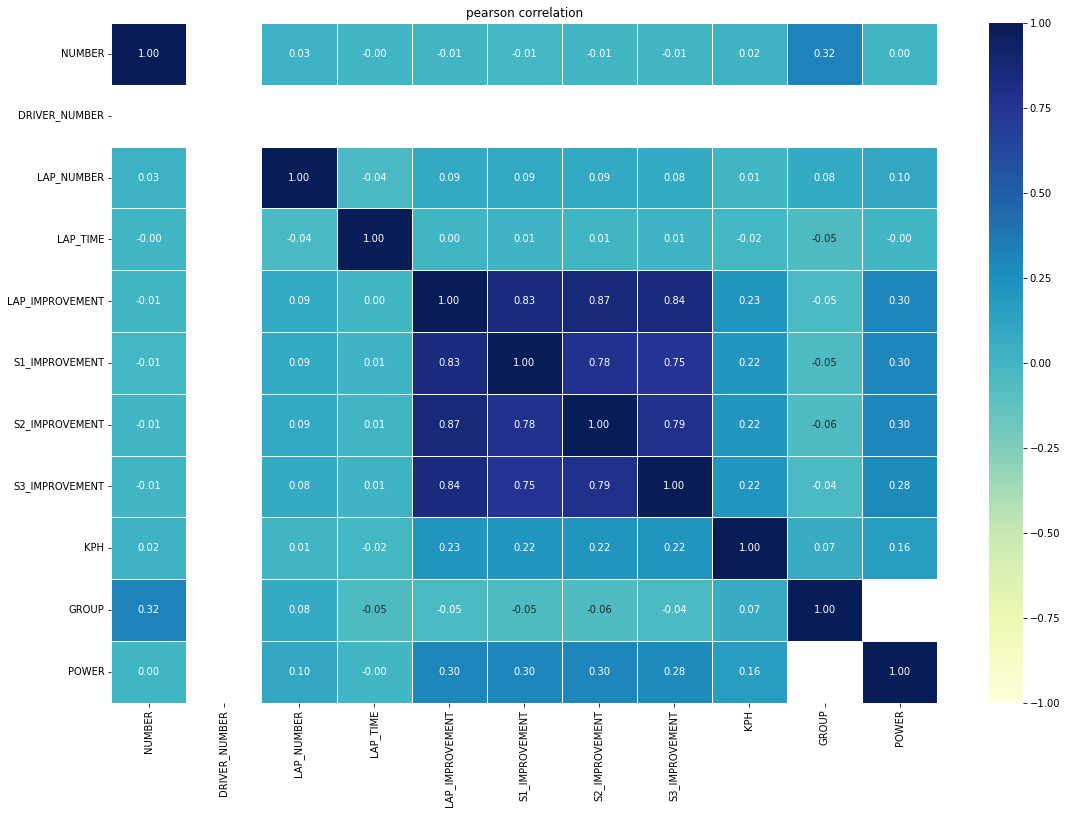

In [21]:
from matplotlib import pyplot as plt
from matplotlib import pyplot 
import seaborn as sns
plt.figure(figsize=(18.5,12.5))
corr_matrix = train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("pearson correlation")

<AxesSubplot:title={'center':'LAP TIME LOG'}, xlabel='LAP_TIME', ylabel='Count'>

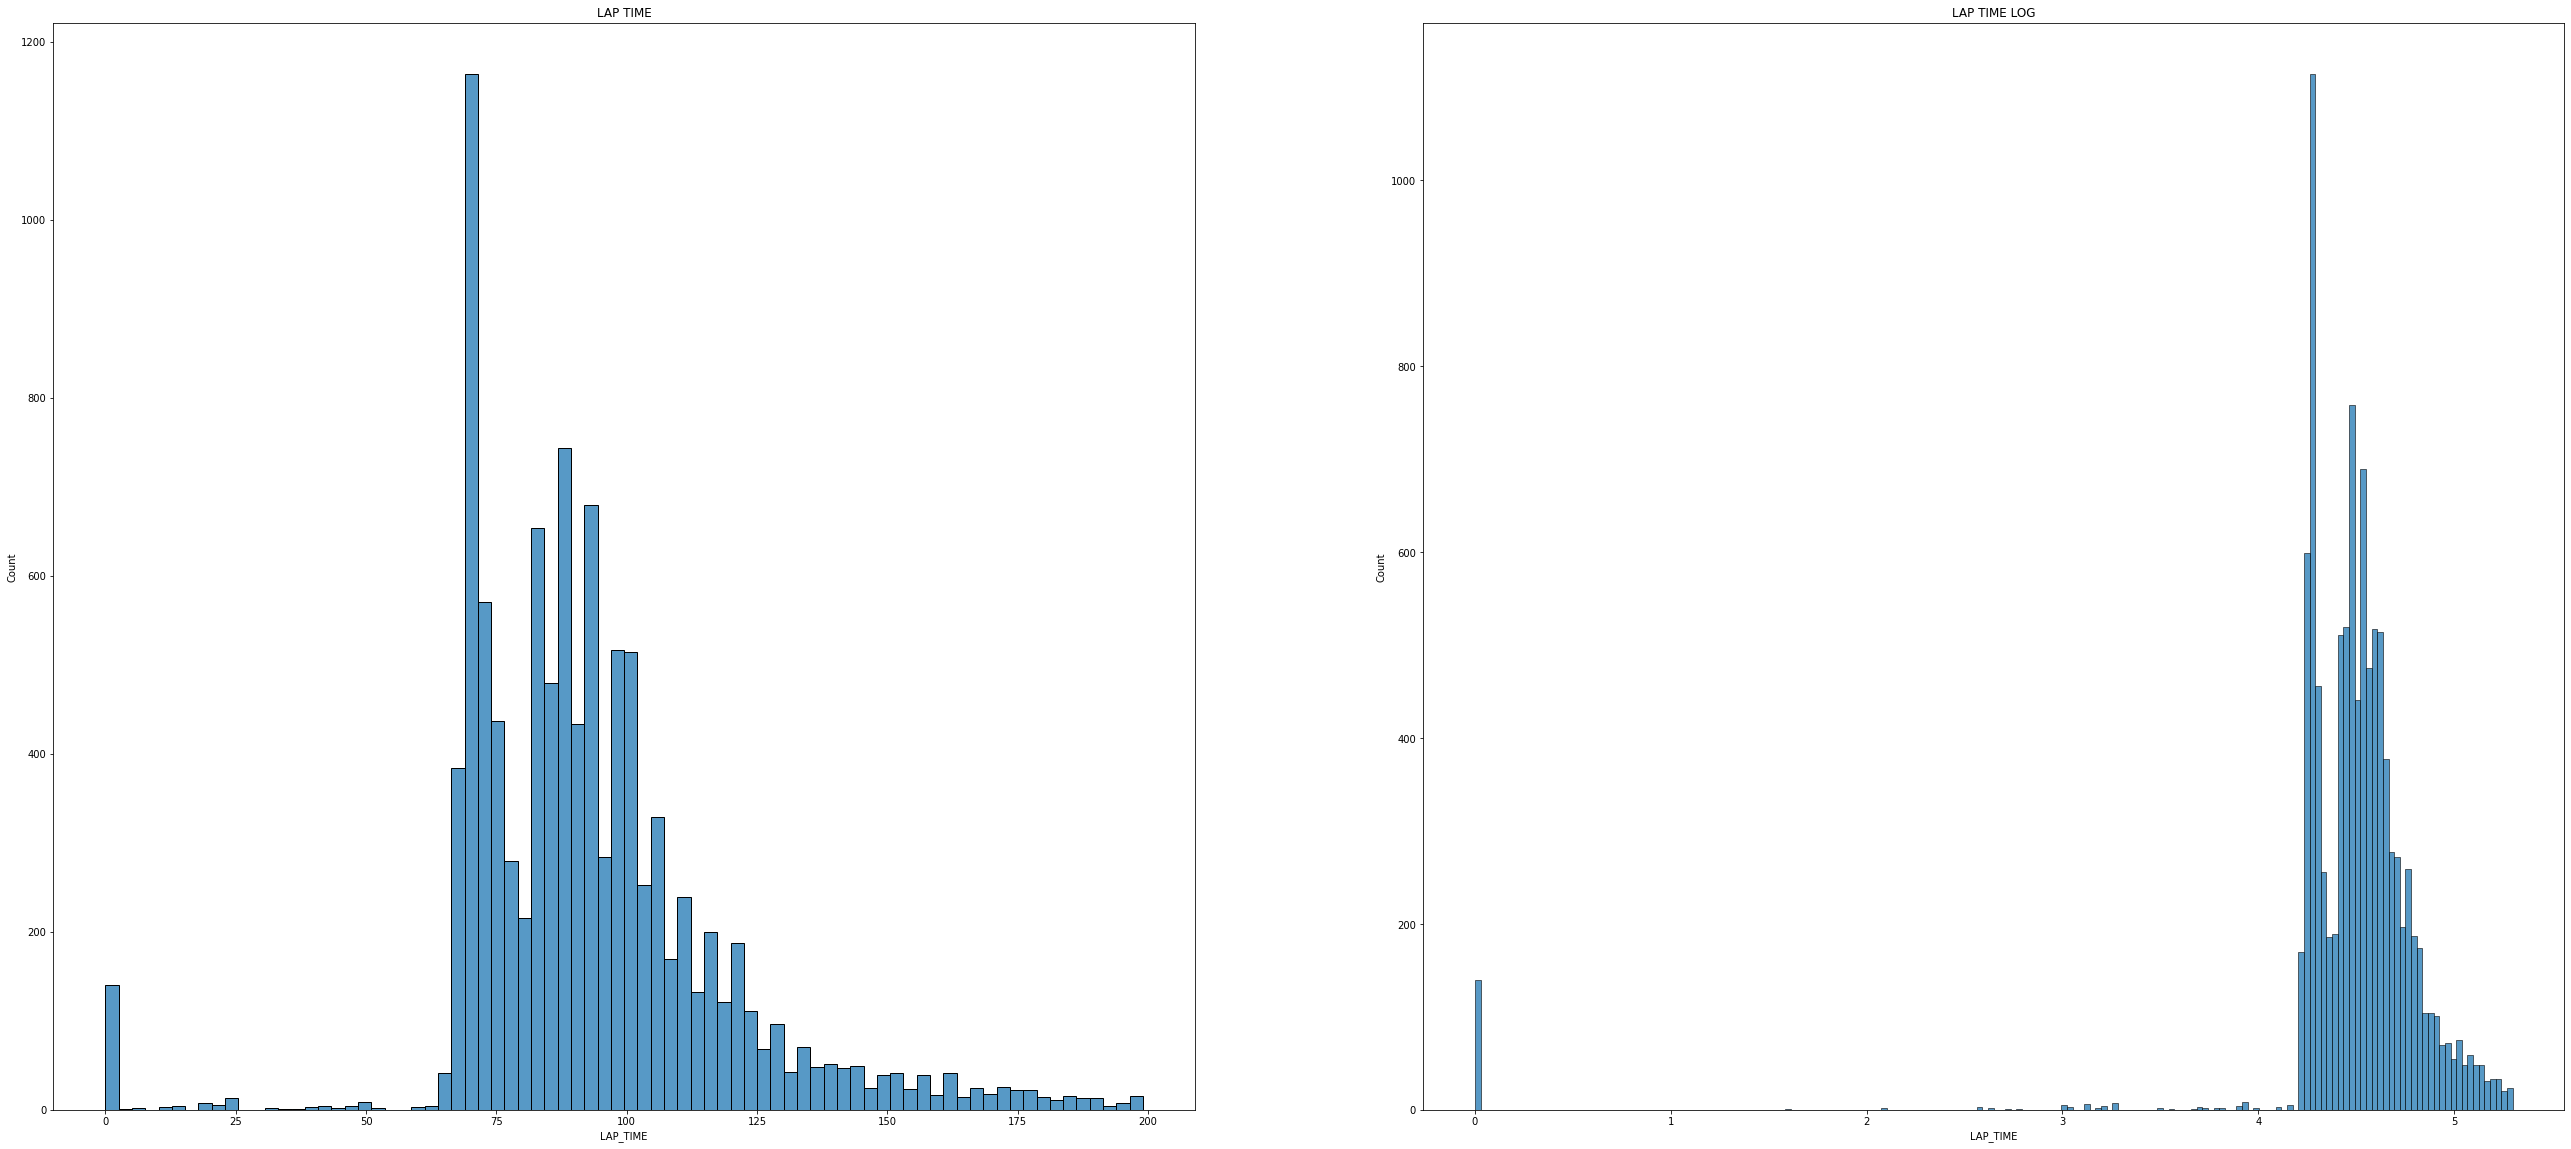

In [22]:
target = train['LAP_TIME']
fig, axes = pyplot.subplots(figsize=(45, 20), nrows=1, ncols=2)

# class distrib
axes[0].set_title(label='LAP TIME')

sns.histplot(train, x="LAP_TIME",ax=axes[0]) 
axes[1].set_title(label='LAP TIME LOG')
#axes.set_title(label='LAP TIME') 
sns.histplot(np.log1p(target),ax=axes[1])  

In [23]:
target = np.log1p(train['LAP_TIME'])
train.drop('LAP_TIME',axis=1,inplace=True)
train_test = pd.concat([train,test],axis=0)

In [24]:
kph = train_test[['LOCATION','EVENT','KPH']].groupby(['LOCATION','EVENT']).agg(['mean']).reset_index()
kph.columns  = ['LOCATION','EVENT','kph_MEAN']

In [25]:
#train_test_dum = pd.get_dummies(train_test[['LOCATION']]) 
train_test_dum1 = pd.get_dummies(train_test[['EVENT']]) 
train_test = pd.concat([train_test,train_test_dum1],axis=1)
train_test['S_IMPROVEMENT_ALL'] = train_test['S1_IMPROVEMENT'] +  train_test['S2_IMPROVEMENT'] + train_test['S3_IMPROVEMENT'] 
train_test.drop(['DRIVER_NUMBER','S2_IMPROVEMENT','S1_LARGE','S2_LARGE','S3_LARGE'],axis=1,inplace=True)
#train_test['Improvment_pcnt'] = train_test['LAP_IMPROVEMENT'] /  train_test['S_IMPROVEMENT_ALL']
#train_test['Improvment_pcnt'] = train_test['Improvment_pcnt'].fillna(0)
#train_test['Improvment_pcnt'] = train_test['Improvment_pcnt'].replace([np.inf, -np.inf], 0)
#train_test = train_test.replace(replaceStruct)
#train_test = pd.merge(train_test,kph,how='left',on=['LOCATION','EVENT'])
#train_test['kph_MEAN_new'] = train_test['KPH'] - train_test['kph_MEAN']
#train_test.drop(['kph_MEAN'],axis=1,inplace=True)

In [26]:
#train_test['S1'] = train_test['S1'].apply(time2seconds)        

train_test['EVENT1'] = train_test['EVENT']
train_test['EVENT1'] = train_test['EVENT1'].apply(lambda x:'Free Practice' if x.find('Free Practice') != -1  else x)
train_test['EVENT1'] = train_test['EVENT1'].apply(lambda x:'Qualifying Group' if x.find('Qualifying Group')  != -1 else x)
train_test = pd.merge(train_test,WIND_DIRECTION,how='left',on=['LOCATION','EVENT'])
#train_test = pd.merge(train_test,RAIN,how='left',on=['LOCATION','EVENT'])
train_test = pd.merge(train_test,HUMIDITY,how='left',on=['LOCATION','EVENT'])
train_test = pd.merge(train_test,AIR_TEMP,how='left',on=['LOCATION','EVENT'])
#train_test = pd.merge(train_test,TRACK_TEMP,how='left',on=['LOCATION','EVENT'])
print(train_test.shape)
#train_test = pd.merge(train_test,lap_time,how='left',on=['LAP_NUMBER','LOCATION'])
#train_test = pd.merge(train_test,dr_rank,how='left',on=['DRIVER_NAME'])

print(train_test.shape)
#train_test['Driver_Rank']


(10696, 32)
(10696, 32)


In [27]:

weather[(weather.EVENT == 'Free Practice 2') & (weather.LOCATION == 'Location 2') & (weather.HOUR == '22:02.0')]    

,TIME_UTC_SECONDS,TIME_UTC_STR,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN,LOCATION,EVENT,HOUR


In [28]:
train_test[(train_test.EVENT == 'Free Practice 2') & (train_test.LOCATION == 'Location 2')]

,NUMBER,LAP_NUMBER,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT,LAP_TIME,EVENT_Free Practice 1,EVENT_Free Practice 2,EVENT_Free Practice 3,EVENT_Qualifying Group 1,EVENT_Qualifying Group 2,EVENT_Qualifying Group 3,EVENT_Qualifying Group 4,S_IMPROVEMENT_ALL,EVENT1,WIND_DIRECTION_MEAN,HUMIDITY_MEAN,AIR_TEMP_MEAN
0,10,1,0,NaN,05:43.3,0,35.427,43.313,0,28.8,07:02.0,22:02.0,SB,05:14.7,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
1,10,2,2,NaN,25.674,2,33.399,41.922,2,120.5,08:43.0,23:43.0,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,6,Free Practice,148.0,60.432432,15.030043
2,10,3,0,B,28.129,0,34.091,57.248,0,101.9,10:42.5,25:42.5,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
3,11,1,0,NaN,01:05.0,0,38.416,56.833,0,75.9,02:40.2,17:40.2,LGRA,00:33.0,NaN,AD,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
4,11,2,0,NaN,28.013,0,36.743,44.716,0,111.2,04:29.7,19:29.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,99,2,0,NaN,28.179,0,37.287,45.969,0,109.2,04:50.1,19:50.1,PWEHRL,NaN,NaN,TAG,235.0,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
98,99,3,2,NaN,25.051,3,32.737,42.742,2,121.0,06:30.7,21:30.7,PWEHRL,NaN,NaN,TAG,235.0,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,7,Free Practice,148.0,60.432432,15.030043
99,99,4,0,NaN,28.819,0,38.482,52.421,0,101.6,08:30.4,23:30.4,PWEHRL,NaN,NaN,TAG,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
100,99,5,0,NaN,26.373,0,34.399,45.036,0,115.0,10:16.2,25:16.2,PWEHRL,NaN,NaN,TAG,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043


In [29]:
def time2seconds(time):
    if type(time) != str:
        return time

    parts = [float(p) for p in time.split(':')]
    parts = [p * (60 ** i) for i, p in enumerate(reversed(parts))]
    return sum(parts)

TIME_COLUMNS = ['ELAPSED','PIT_TIME', 'HOUR']

for c in TIME_COLUMNS:
      train_test[c] = train_test[c].apply(time2seconds)
train_test.head()        

,NUMBER,LAP_NUMBER,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT,LAP_TIME,EVENT_Free Practice 1,EVENT_Free Practice 2,EVENT_Free Practice 3,EVENT_Qualifying Group 1,EVENT_Qualifying Group 2,EVENT_Qualifying Group 3,EVENT_Qualifying Group 4,S_IMPROVEMENT_ALL,EVENT1,WIND_DIRECTION_MEAN,HUMIDITY_MEAN,AIR_TEMP_MEAN
0,10,1,0,NaN,05:43.3,0,35.427,43.313,0,28.8,422.0,1322.0,SB,314.7,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
1,10,2,2,NaN,25.674,2,33.399,41.922,2,120.5,523.0,1423.0,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,6,Free Practice,148.0,60.432432,15.030043
2,10,3,0,B,28.129,0,34.091,57.248,0,101.9,642.5,1542.5,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
3,11,1,0,NaN,01:05.0,0,38.416,56.833,0,75.9,160.2,1060.2,LGRA,33.0,NaN,AD,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043
4,11,2,0,NaN,28.013,0,36.743,44.716,0,111.2,269.7,1169.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043


In [30]:

train_test['HOUR_lagged'] = train_test.groupby(['DRIVER_NAME'])['HOUR'].shift(1)
train_test['HOUR1'] =  train_test['HOUR']
train_test['S1_New'] =  train_test['S1']
train_test['S2_New'] =  train_test['S2']
train_test['S3_New'] =  train_test['S3']
train_test['PIT_TIME_New'] =  train_test['PIT_TIME']
#train['HOUR_lagged1'] = train['HOUR'].astype(float) - train['HOUR_lagged'].astype(float) 

def time2seconds(time):
    if type(time) != str:
        return time

    parts = [float(p) for p in time.split(':')]
    parts = [p * (60 ** i) for i, p in enumerate(reversed(parts))]
    return sum(parts)

TIME_COLUMNS = ['HOUR1','HOUR_lagged','S1_New','S2_New','S3_New','PIT_TIME_New']

for c in TIME_COLUMNS:
      train_test[c] = train_test[c].apply(time2seconds)
train_test['HOUR_lagged1'] = train_test['HOUR1'].astype(float) - train_test['HOUR_lagged'].astype(float)   
train_test['PIT_TIME1'] = train_test['PIT_TIME'].astype(str)
train_test['PIT_TIME_New'] = train_test.apply(lambda x:0 if x['PIT_TIME1'] == 'nan' else x['PIT_TIME_New'],axis=1)
train_test['S_ALL'] = train_test['S1_New'] +  train_test['S2_New'] + train_test['S3_New'] - train_test['PIT_TIME_New']
train_test.drop(['HOUR_lagged','HOUR1','S1_New','S2_New','S3_New','PIT_TIME_New','NUMBER','PIT_TIME1'],axis=1,inplace=True)
#train_test.drop(['GROUP', 'POWER'],axis=1,inplace=True)
train_test.head()   

,LAP_NUMBER,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT,LAP_TIME,EVENT_Free Practice 1,EVENT_Free Practice 2,EVENT_Free Practice 3,EVENT_Qualifying Group 1,EVENT_Qualifying Group 2,EVENT_Qualifying Group 3,EVENT_Qualifying Group 4,S_IMPROVEMENT_ALL,EVENT1,WIND_DIRECTION_MEAN,HUMIDITY_MEAN,AIR_TEMP_MEAN,HOUR_lagged1,S_ALL
0,1,0,NaN,05:43.3,0,35.427,43.313,0,28.8,422.0,1322.0,SB,314.7,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043,NaN,107.340
1,2,2,NaN,25.674,2,33.399,41.922,2,120.5,523.0,1423.0,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,6,Free Practice,148.0,60.432432,15.030043,101.0,100.995
2,3,0,B,28.129,0,34.091,57.248,0,101.9,642.5,1542.5,SB,NaN,NaN,JR,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043,119.5,119.468
3,1,0,NaN,01:05.0,0,38.416,56.833,0,75.9,160.2,1060.2,LGRA,33.0,NaN,AD,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043,NaN,127.249
4,2,0,NaN,28.013,0,36.743,44.716,0,111.2,269.7,1169.7,LGRA,NaN,NaN,AD,NaN,Location 2,Free Practice 2,NaN,0,1,0,0,0,0,0,0,Free Practice,148.0,60.432432,15.030043,109.5,109.472


In [31]:
#train_test['S1_New'].value_counts()

In [32]:
#train_test['S1_New'].fillna(train_test['S1_New'].median(),inplace=True)
#train_test['S2_New'].fillna(train_test['S2_New'].median(),inplace=True)
#train_test['S3_New'].fillna(train_test['S3_New'].median(),inplace=True)


In [33]:
train_test['TEAM'] =  train_test['TEAM'].astype(str)
#train_test.groupby(['TEAM','DRIVER_NAME']).size()
train_test['TEAM'] = train_test['TEAM'].apply(lambda x:"AD" if x == "AR" else x)
train_test['TEAM'] = train_test['TEAM'].str.replace("BMWE","BMW1")
train_test['TEAM'] = train_test['TEAM'].str.replace("DRAGONo","DRAGONR")
train_test['TEAM'] = train_test['TEAM'].str.replace("DRAGON√É","DRAGONR")
train_test['TEAM'] = train_test['TEAM'].str.replace("DS¬â","DSo")
train_test['TEAM'] = train_test['TEAM'].str.replace("EF","EA")
train_test['TEAM'] = train_test['TEAM'].str.replace("JE","JR")
#train['TEAM'] = train['DRIVER_NAME'].str.replace("AS","MAHINDRAd")
train_test['TEAM'] = train_test['TEAM'].str.replace("ME","M1")
train_test['TEAM'] = train_test['TEAM'].str.replace("Nt","N")
train_test['TEAM'] = train_test['TEAM'].str.replace("ROKo","ROK")
train_test['TEAM'] = train_test['TEAM'].str.replace("NIOO","NIO")
train_test['TEAM'] = train_test['TEAM'].str.replace("N","N")
train_test['TEAM'] = train_test['TEAM'].str.replace("BMW1","BMW1")
train_test['TEAM'] = train_test['TEAM'].str.replace("ROK","ROK")
#train['TEAM'] = train['DRIVER_NAME'].str.replace("PWEHRL","TAG")
train_test['POWER'] = train_test['POWER'].fillna(200) 

Text(0.5, 1.0, 'pearson correlation')

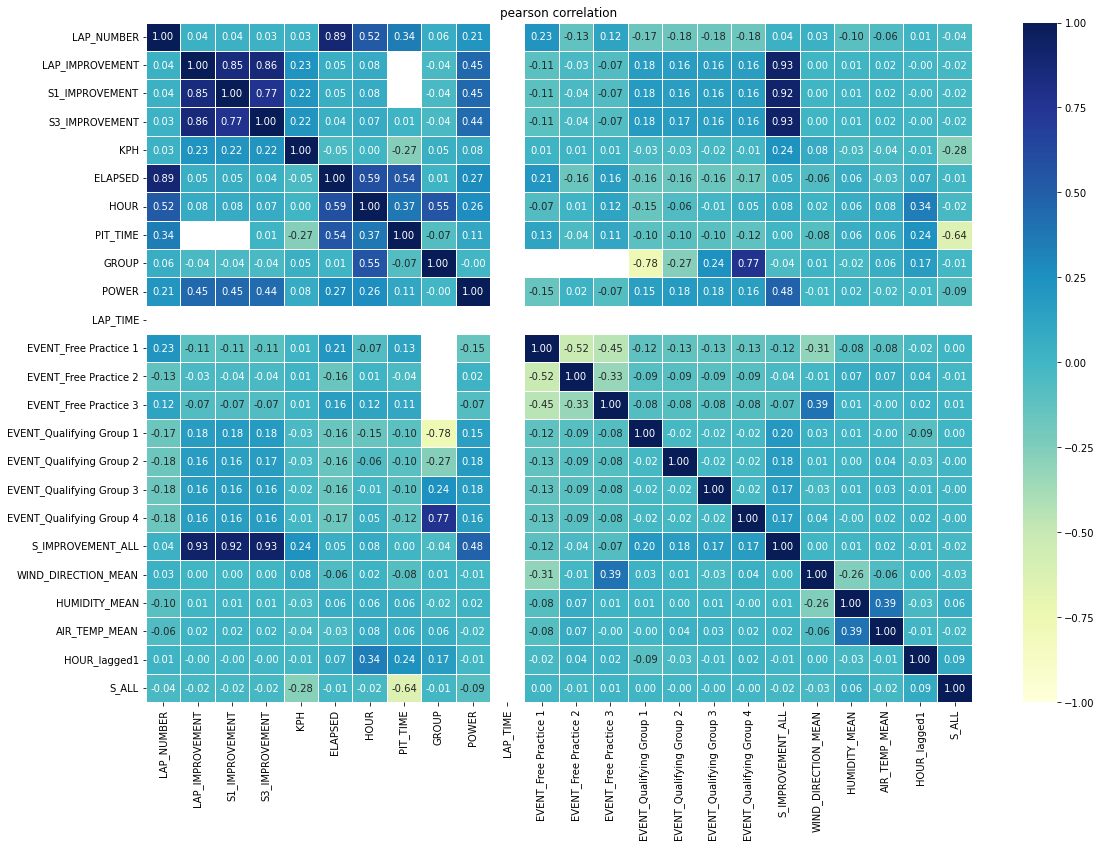

In [34]:
from matplotlib import pyplot as plt
from matplotlib import pyplot 
import seaborn as sns
plt.figure(figsize=(18.5,12.5))
corr_matrix = train_test.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("pearson correlation")

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for colname,coltype in train_test.dtypes.iteritems():
    if coltype == 'object':
        print("Encoding :","'" + colname + "'")
        train_test[colname] = label_encoder.fit_transform(train_test[colname].astype(str))        
        colnames = train_test.groupby([colname]).size()
        train_test[colname+"_Freq"]   = train_test[colname].apply(lambda x : colnames[x])
    if colname in ('S1_New','S2_New''S3_New'):                   
        colnames = train_test.groupby([colname]).size()
        train_test[colname+"_Freq"]   = train_test[colname].apply(lambda x : colnames[x])

Encoding : 'CROSSING_FINISH_LINE_IN_PIT'
Encoding : 'S1'
Encoding : 'S2'
Encoding : 'S3'
Encoding : 'DRIVER_NAME'
Encoding : 'TEAM'
Encoding : 'LOCATION'
Encoding : 'EVENT'
Encoding : 'EVENT1'


In [36]:
#train_test.drop(['EVENT1_Freq','CROSSING_FINISH_LINE_IN_PIT_Freq'],axis=1,inplace=True)
train_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 0 to 10695
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LAP_NUMBER                        10696 non-null  int64  
 1   LAP_IMPROVEMENT                   10696 non-null  int64  
 2   CROSSING_FINISH_LINE_IN_PIT       10696 non-null  int64  
 3   S1                                10696 non-null  int64  
 4   S1_IMPROVEMENT                    10696 non-null  int64  
 5   S2                                10696 non-null  int64  
 6   S3                                10696 non-null  int64  
 7   S3_IMPROVEMENT                    10696 non-null  int64  
 8   KPH                               10664 non-null  float64
 9   ELAPSED                           10696 non-null  float64
 10  HOUR                              10696 non-null  float64
 11  DRIVER_NAME                       10696 non-null  int64  
 12  PIT_

In [37]:
#train_test['KPH'] = train_test['KPH'] /3600 
#train_test['KPH'] = train_test['KPH'].fillna(train_test['KPH'].mean())
#train_test['difference'] = train_test['HOUR'] - train_test['ELAPSED']
#train_test['S1_LARGE'] = train_test['S1_LARGE'].fillna(train_test['S1_LARGE'].median())
#train_test['S2_LARGE'] = train_test['S2_LARGE'].fillna(train_test['S2_LARGE'].median())
#train_test['S3_LARGE'] = train_test['S3_LARGE'].fillna(train_test['S3_LARGE'].median())
#train_test['s1_s2_difference'] = train_test['S1_LARGE'] - train_test['S2_LARGE']
#train_test['s2_s3_difference'] = train_test['S2_LARGE'] - train_test['S3_LARGE']
#train_test['s1_s3_difference'] = train_test['S1_LARGE'] - train_test['S3_LARGE']

train1 = train_test[0:train.shape[0]]
test1 = train_test[train.shape[0]:train_test.shape[0]]
print(train.shape,test.shape)
print(train1.shape,test1.shape)

(10276, 24) (420, 25)
(10276, 42) (420, 42)


In [38]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10276 entries, 0 to 10275
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   LAP_NUMBER                        10276 non-null  int64  
 1   LAP_IMPROVEMENT                   10276 non-null  int64  
 2   CROSSING_FINISH_LINE_IN_PIT       10276 non-null  int64  
 3   S1                                10276 non-null  int64  
 4   S1_IMPROVEMENT                    10276 non-null  int64  
 5   S2                                10276 non-null  int64  
 6   S3                                10276 non-null  int64  
 7   S3_IMPROVEMENT                    10276 non-null  int64  
 8   KPH                               10246 non-null  float64
 9   ELAPSED                           10276 non-null  float64
 10  HOUR                              10276 non-null  float64
 11  DRIVER_NAME                       10276 non-null  int64  
 12  PIT_

In [39]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(mean_squared_log_error(np.log1p(y_true + 1) - np.log1p(y_pred + 1)))


In [40]:
from sklearn.model_selection import train_test_split
Xt,Xv,Yt,Yv = train_test_split(train1,target,test_size=.20,random_state=1234)
import lightgbm as lgb
import xgboost
import math
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor

test1.drop('LOCATION',axis=1,inplace=True)
Xv.drop('LOCATION',axis=1,inplace=True)

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.03,
    'feature_fraction': 0.9,
    #'bagging_fraction': 1,
    #'bagging_freq': 10,
    'verbose': -1,
    'verbose_eval' :50,
    "max_depth": 8,
    "num_leaves": 32,  
    "max_bin": 200,
    "num_iterations": 100000,
    "n_estimators": 10000,
    'lambda_l1' : 1,
    'random_state': 1234
}

model = lgb.LGBMRegressor(**hyper_params)
model_Cat = CatBoostRegressor(iterations=5000,
                          verbose = 50,    
                          early_stopping_rounds = 100,  
                         # l2_leaf_reg = .4,    
                         # subsample = .9,    
                         # cat_features = ['ID'],    
                          #n_estimators = 200,
                          learning_rate=0.03,
                          depth=7)

params_xgb = {'objective': 'reg:squarederror',           
          'booster':'gbtree',
          'metrics': 'rmse',
          'eta': 0.01,
          'max_depth': 6, 
          'subsample': 0.9, 
          'colsample_bytree': 0.9,
          #'alpha':0.1,
          'random_state': 42, 
          'silent': True}


y_test_pred = 0* Yv
test_pred1 = 0
pred = 0 

y_test_pred1 = 0* Yv
test_pred2 = 0

y_test_pred_xgb = 0* Yv
test_pred_xgb = 0

K = 5
kf = StratifiedKFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(0)
for i, (train_index, test_index) in enumerate(kf.split(train1,train1['DRIVER_NAME'])):
    
    # Create data for this fold
    #train1['LOCATION'] = 1
    
    y_train, y_valid = target.iloc[train_index].copy(), target.iloc[test_index]
    X_train, X_valid = train1.iloc[train_index,:].copy(), train1.iloc[test_index,:].copy()
    X_test = test1.copy()
    
    X_train.drop('LOCATION',axis=1,inplace=True)
    X_valid.drop('LOCATION',axis=1,inplace=True)
    dtrain = xgboost.DMatrix(data = X_train, label = y_train)
    dtest=xgboost.DMatrix(data = X_valid, label=y_valid)
    watchlist = [(dtrain, 'train'), (dtest, 'valid')]
    print( "\nFold ", i)
    eval_set=[(X_valid,y_valid)]
    
    model = model.fit(X_train, y_train,eval_set=[(X_valid, y_valid),(X_train, y_train)],
      # categorical_feature = ['ID'],                      
      #  eval_metric='rmsle',
        early_stopping_rounds=50,
        verbose=50)
    model_Cat = model_Cat.fit(X_train, y_train,eval_set=(X_valid, y_valid))
        
    fit_model = xgboost.train(params_xgb, dtrain,10000,watchlist,early_stopping_rounds = 25, verbose_eval=50)
    print( "  Best N trees = ", fit_model.best_ntree_limit )
    print( "  Best gini = ", fit_model.best_score )
    
    
    test_pred1 +=  model.predict(test1) 
    y_test_pred += model.predict(Xv)  
    test_pred2 += model_Cat.predict(test1)
    y_test_pred1 += model_Cat.predict(Xv)  
    test_pred_xgb += fit_model.predict(xgboost.DMatrix(test1))
    y_test_pred_xgb += fit_model.predict(xgboost.DMatrix(Xv))  
    
y_test_pred /= (K )  # Average test set predictions

test_pred1 /= (K )


y_test_pred1 /= (K )  # Average test set predictions

test_pred2 /= (K )
test_pred_xgb /= (K )
y_test_pred_xgb /= (K )


test_pred1 = np.expm1(test_pred1)
y_test_pred = np.expm1(y_test_pred)

test_pred2 = np.expm1(test_pred2)
y_test_pred1 = np.expm1(y_test_pred1)

test_pred_xgb = np.expm1(test_pred_xgb)
y_test_pred_xgb = np.expm1(y_test_pred_xgb)
    

print(math.sqrt(np.square(np.subtract(np.expm1(Yv),y_test_pred)).mean()))
print(math.sqrt(np.square(np.subtract(np.expm1(Yv),y_test_pred1)).mean()))
print(math.sqrt(np.square(np.subtract(np.expm1(Yv),y_test_pred_xgb)).mean()))
print(math.sqrt(np.square(np.subtract(np.expm1(Yv),(y_test_pred + y_test_pred1)/2)).mean()))
print(math.sqrt(np.square(np.subtract(np.expm1(Yv),(y_test_pred +   y_test_pred_xgb)/2)).mean()))
print(math.sqrt(np.square(np.subtract(np.expm1(Yv),(y_test_pred + y_test_pred1 +  y_test_pred_xgb)/3)).mean()))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))



Fold  0
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Training until validation scores don't improve for 50 rounds
[50]	training's rmse: 0.50938	valid_0's rmse: 0.603422
[100]	training's rmse: 0.482058	valid_0's rmse: 0.608436
Early stopping, best iteration is:
[52]	training's rmse: 0.508158	valid_0's rmse: 0.60317
0:	learn: 0.5648946	test: 0.6218506	best: 0.6218506 (0)	total: 56.3ms	remaining: 4m 41s
50:	learn: 0.5308173	test: 0.5981797	best: 0.5981797 (50)	total: 284ms	remaining: 27.6s
100:	learn: 0.5185680	test: 0.5968563	best: 0.5965530 (95)	total: 521ms	remaining: 25.3s
150:	learn: 0.5116134	test: 0.5968249	best: 0.5965530 (95)	total: 761ms	remaining: 24.4s
200:	learn: 0.5041850	test: 0.5964524	best: 0.5963748 (190)	total: 991ms	remaining: 23.7s
250:	lea

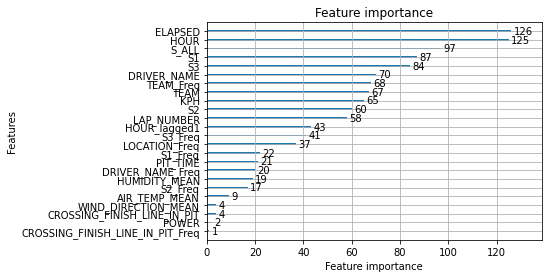

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
lgb.plot_importance(model)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

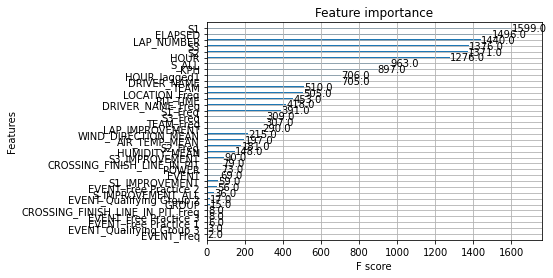

In [42]:
xgboost.plot_importance(fit_model)

In [43]:
subm.LAP_TIME = (test_pred2 ) 
subm

,LAP_TIME
0,93.397413
1,93.085307
2,93.737103
3,94.297184
4,93.210537
...,...
415,65.103591
416,58.714042
417,52.995440
418,55.698194


In [44]:
subm.to_csv('submission.csv', index=False)
subm.to_excel("submission.xlsx",sheet_name='submission')